In [447]:
import pandas as pd
import os
dir_path='C:\\Data Science\\kaggle regr competion'
file_name='train.csv'
dataset=pd.read_csv(os.path.join(dir_path,file_name))
dataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [448]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [449]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [450]:
dataset.drop_duplicates(inplace=True)
col=list(dataset.columns)

In [451]:
nan_col=[]
for c in col:
    if dataset[c].isnull().sum()!=0:
        nan_col.append(c)
        
print(nan_col)
print(len(nan_col))


['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
19


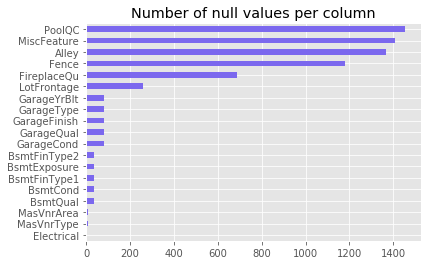

In [452]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
dataset[nan_col].isnull().sum().sort_values(ascending=True).plot.barh(grid=True,
                                                                      color='mediumslateblue', 
                                                                      title='Number of null values per column');
plt.show()

In [453]:
#print(plt.style.available)

In [454]:
high_nan_col=[]
for c in col:
    if dataset[c].isnull().sum()/dataset.shape[0]>0.5:
        high_nan_col.append(c)
        
print(high_nan_col)
print(len(high_nan_col))

['Alley', 'PoolQC', 'Fence', 'MiscFeature']
4


In [455]:
dataset.drop(high_nan_col,axis=1,inplace=True)
dataset.FireplaceQu.fillna('no_fireplace',inplace=True)

In [456]:
num_nan_col=[]
num_col=list(dataset.select_dtypes(include=['integer','float'],exclude=['object']).columns)
for c in list(dataset[num_col].columns):
    if dataset[c].isnull().sum()!=0:
        num_nan_col.append(c)

In [457]:
num_col

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [458]:
from sklearn.preprocessing import Imputer
col_index=dataset.columns.get_loc('GarageYrBlt')
imputer=Imputer(missing_values="NaN",strategy='median',axis=0)
s=dataset.iloc[:,col_index].reshape(-1, 1)
imputer=imputer.fit(s)
dataset.iloc[:,col_index]=imputer.transform(s)

C:\Users\moisessalazar77\Anaconda3\envs\regression_competition\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [459]:
col_index=dataset.columns.get_loc('MasVnrArea')
imputer=Imputer(missing_values="NaN",strategy='median',axis=0)
s=dataset.iloc[:,col_index].reshape(-1, 1)
imputer=imputer.fit(s)
dataset.iloc[:,col_index]=imputer.transform(s)

C:\Users\moisessalazar77\Anaconda3\envs\regression_competition\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


In [460]:
col_index=dataset.columns.get_loc('LotFrontage')
imputer=Imputer(missing_values="NaN",strategy='median',axis=0)
s=dataset.iloc[:,col_index].reshape(-1, 1)
imputer=imputer.fit(s)
dataset.iloc[:,col_index]=imputer.transform(s)

C:\Users\moisessalazar77\Anaconda3\envs\regression_competition\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


In [461]:
dataset.drop(dataset[(dataset['LotArea'] >150000)].index,inplace=True)
dataset.drop(dataset[(dataset['BsmtFinSF1'] >4000)].index,inplace=True)
dataset.drop(dataset[(dataset['BsmtUnfSF'] >2250)].index,inplace=True)
dataset.drop(dataset[(dataset['TotalBsmtSF'] >2500)].index,inplace=True)
dataset.drop(dataset[(dataset['1stFlrSF'] >2300)].index,inplace=True)
dataset.drop(dataset[(dataset['GrLivArea'] >2750)].index,inplace=True)
dataset.drop(dataset[(dataset['GarageArea'] >1000)].index,inplace=True)
dataset.drop(dataset[(dataset['WoodDeckSF'] >400)].index,inplace=True)
dataset.drop(dataset[(dataset['OpenPorchSF'] >200)].index,inplace=True)
dataset.drop(dataset[(dataset['SalePrice'] >500000)].index,inplace=True)

In [462]:
dataset['Age'] = dataset.YrSold - dataset.YearBuilt
dataset['AgeRemod'] = dataset.YrSold - dataset.YearRemodAdd
dataset['AgeGarage'] = dataset.YrSold - dataset.GarageYrBlt

# For the houses without a Garage, I filled the NANs with zeros, which makes AgeGarage ~ 2000
# Here I replace their AgeGarage with the maximum value among the houses with Garages
max_AgeGarage = np.max(dataset.AgeGarage[dataset.AgeGarage < 1000])
dataset['AgeGarage'] = dataset['AgeGarage'].map(lambda x: max_AgeGarage if x > 1000 else x)

# Some of the values are negative because the work was done after the house 
# was sold. In these cases, I change them to zero to avoid negative ages.
dataset.Age = dataset.Age.map(lambda x: 0 if x < 0 else x)
dataset.AgeRemod = dataset.AgeRemod.map(lambda x: 0 if x < 0 else x)
dataset.AgeGarage = dataset.AgeGarage.map(lambda x: 0 if x < 0 else x)

In [463]:
# drop the original time variables
drop_list=list(['Id','YrSold','MoSold','SaleCondition','SaleType','GarageYrBlt','YearBuilt','YearRemodAdd'])
dataset=dataset.drop(drop_list,axis=1)

In [464]:
obj_nan_col=[]
obj_col=list(dataset.select_dtypes(include=['object'],exclude=['integer','float']).columns)
obj_var=dataset[obj_col]
for c in list(obj_var.columns):
    if obj_var[c].isnull().sum()!=0:
        obj_nan_col.append(c)

In [465]:
obj_col

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive']

In [466]:
for i in obj_col:
    print(dataset[i].unique())

['RL' 'RM' 'C (all)' 'FV' 'RH']
['Pave' 'Grvl']
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'HLS' 'Low']
['AllPub' 'NoSeWa']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Gtl' 'Mod' 'Sev']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'OldTown'
 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR' 'MeadowV'
 'Edwards' 'Timber' 'Gilbert' 'ClearCr' 'NWAmes' 'StoneBr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
['Norm' 'Feedr' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'PosN' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'RRAn' 'RRAe']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
['CompShg' 'Metal' 'Membran' 'Tar&Grv' 'WdShngl' 'WdShake' 'Roll']
['VinylSd' 'MetalSd' 'Wd Sdng' 'BrkFace' 'HdBoard' 'WdShing' 'CemntBd'
 'AsbShng' 'Stucco' 'Plywood' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'B

In [467]:
from sklearn.base import TransformerMixin


class SeriesImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        If the Series is of dtype Object, then impute with the most frequent object.
        If the Series is not of dtype Object, then impute with the mean.  

        """
    def fit(self, X, y=None):
        if   X.dtype == np.dtype('O'): self.fill = X.value_counts().index[0]
        else                            : self.fill = X.mean()
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [468]:
import numpy as np
si=SeriesImputer()
for c in obj_nan_col:
    si.fit(dataset[c])
    dataset[c]=si.transform(dataset[c])

In [469]:
dataset=pd.get_dummies(dataset,columns=obj_col, prefix=obj_col,drop_first=True)

In [470]:
added_dummy_cols = []
for item in list(dataset.columns):
    if item.split('_')[0] in obj_col:
        added_dummy_cols.append(item)

In [471]:
added_dummy_cols

['MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 

In [472]:
file_name='preprocessedtrain.csv'
dataset.to_csv(os.path.join(dir_path,file_name),encoding='utf-8-sig',index=False)